In [336]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import os
import reionizer

#Call data files
LFz_data_dir = os.environ['LYA_DATA_DIR']+'data/models/' #calls directory
LFz_dir = LFz_data_dir+'MTT15_UVLF/LF_pred/' #inside models folder call MTT15_UVLF/LF_pred/ folder
LFz_files = sorted(reionizer.insensitive_glob(LFz_dir+'LF_pred_z*.txt')) 
#calls each file in modelled data * will be replaced with corresponding zval



#Call LF_pred files by calling file name at specific z value 
LFz_tab = np.array([float(f.split('LF_pred_z')[-1].split('.txt')[0]) for f in LFz_files]) 

#Function used to load files
def load_uvf_pandas(ufl_filename): 
    """
    Load table into pandas df
    """
    uvf_tab_df = pd.read_csv(ufl_filename, skiprows=1, delim_whitespace=True)
    
    # Shuffle the column names to remove the '#' from the first column
    uvf_tab_df.columns = np.roll(uvf_tab_df.columns, -1)

    # Cut off the last (empty) column
    uvf_tab_df = uvf_tab_df.iloc[:, :-1]

    return uvf_tab_df

#Define variables by calling array for  
zval_array = np.array([4.9,5.9,6.8])
zval_array1 = np.array([0.3,2.0,3.8,4.9])






/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

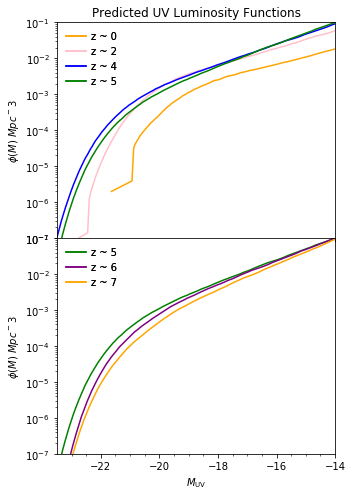

In [345]:
# Ploting values
#rcParams needed to be kept here due to earlier instances of code being run
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
fig = plt.figure(figsize=(5,7))

fig, axs= fig.subplots(ncols=1,nrows=2,gridspec_kw={'hspace': .0},sharex=True, sharey=True)
##This is used for subplots that share same axis

#For loop used in order to plot data for each zval
for zz,zval1 in enumerate (LFz_tab): 
    if zval1 in zval_array1:
        LF_tab = load_uvf_pandas(LFz_files[zz])
        label = 'z ~ %.0f'%zval1
        ls = 'solid'
        if zval1 == 2.0:
            my_color='pink'
        elif zval1== 0.3:
            my_color='orange'
        elif zval1 == 3.8:
            my_color='blue'
        else: 
            my_color = 'green'
        ax1 = plt.subplot(211)
        plt.plot(LF_tab['Muv'],LF_tab['ndens'],color=my_color, ls=ls, label=label)

#Legend
leg_z1 = plt.legend(frameon=False, handletextpad=0.5)
plt.gca().add_artist(leg_z1)
#plt.minorticks_on()
plt.xlim(-23.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.ylabel(r'$\phi(M)\ Mpc^-3$')
plt.title('Predicted UV Luminosity Functions')
plt.tight_layout()


#For loop used in order to plot data for each zval
for zz,zval in enumerate (LFz_tab): 
    if zval in zval_array:
        LF_tab = load_uvf_pandas(LFz_files[zz])
        label = 'z ~ %.0f'%zval
        ls = 'solid'
        if zval == 5.9:
            my_color='purple'
        elif zval== 6.8:
            my_color='orange'
        else:
            my_color='green' 
        ax2 = plt.subplot(212,sharex = ax1)
        plt.plot(LF_tab['Muv'],LF_tab['ndens'],color=my_color, ls=ls, label=label)
        
        ##plt.fill_between(LF_tab['Muv'],LF_tab['ndens_l'],LF_tab['ndens_u'], color=my_color, alpha=0.4)
        ## this is used for upper,lower limits of ndens, however when plotted it makes minor difference
        
#Legend
leg_z = plt.legend(frameon=False, handletextpad=0.5)
plt.gca().add_artist(leg_z)


#Removes tick labels from upper graph's xaxis
plt.setp(ax1.get_xticklabels(), visible=False)

plt.minorticks_on()
plt.xlim(-23.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.xlabel('$M_\mathrm{UV}$')
plt.ylabel(r'$\phi(M)\ Mpc^-3$')
plt.tight_layout()

#adjusts space between subplots to merge together
plt.subplots_adjust(hspace=.0)





#Save the figure
plt.savefig('UVLF2.pdf', dpi=300, bbox_inches='tight')

plt.show()



/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


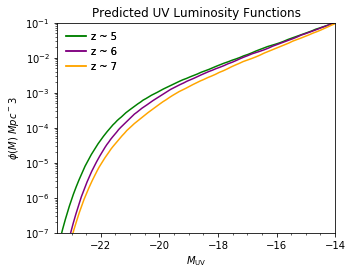

In [346]:
fig = plt.figure(figsize=(5,7))

#For loop used in order to plot data for each zval
for zz,zval in enumerate (LFz_tab): 
    if zval in zval_array:
        LF_tab = load_uvf_pandas(LFz_files[zz])
        label = 'z ~ %.0f'%zval
        ls = 'solid'
        if zval == 5.9:
            my_color='purple'
        elif zval== 6.8:
            my_color='orange'
        else:
            my_color='green' 
        ax2 = plt.subplot(212,sharex = ax1)
        plt.plot(LF_tab['Muv'],LF_tab['ndens'],color=my_color, ls=ls, label=label)
        
        ##plt.fill_between(LF_tab['Muv'],LF_tab['ndens_l'],LF_tab['ndens_u'], color=my_color, alpha=0.4)
        ## this is used for upper,lower limits of ndens, however when plotted it makes minor difference
        
#Legend
leg_z = plt.legend(frameon=False, handletextpad=0.5)
plt.gca().add_artist(leg_z)

plt.minorticks_on()
plt.xlim(-23.5,-14)
plt.ylim(1e-7, 1e-1)
plt.semilogy()


plt.xlabel('$M_\mathrm{UV}$')
plt.ylabel(r'$\phi(M)\ Mpc^-3$')
plt.title('Predicted UV Luminosity Functions')
plt.tight_layout()

#Save the figure
plt.savefig('UVLF.pdf', dpi=300, bbox_inches='tight')

plt.show()